### Name :- Ujjwal Tajne
### Reg no. :- 20BAI10381


                                                 ASSIGNMENT - 2



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Dataset download

https://drive.google.com/file/d/190t0KiKqSdbFl-o_6r3S9Tvwo2mHzrcB/view

### 2. Loading our Dataset

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 3. Perform Below Visualizations.
    ● Univariate Analysis
    ● Bi - Variate Analysis
    ● Multi - Variate Analysis

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

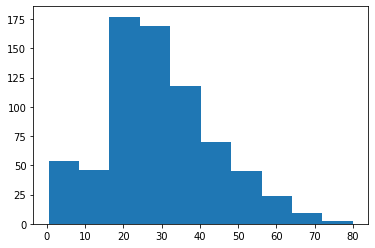

In [20]:
plt.hist(df['age'])

<BarContainer object of 891 artists>

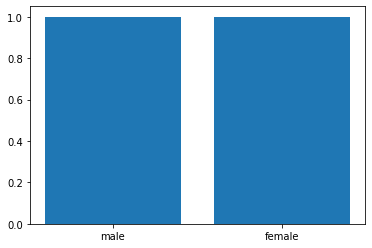

In [16]:
plt.bar(df['sex'], df['survived'])

In [13]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [14]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

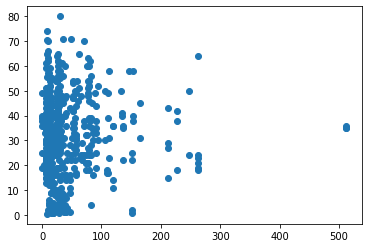

In [24]:
plt.scatter(df['fare'], df['age'])

### 4. Perform descriptive statistics on the dataset.

In [25]:
#Mean
df.mean()

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [26]:
# Median
df.median()

survived       0.0000
pclass         3.0000
age           28.0000
sibsp          0.0000
parch          0.0000
fare          14.4542
adult_male     1.0000
alone          1.0000
dtype: float64

In [27]:
# Mode
df.mode()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,24.0,0,0,8.05,S,Third,man,True,C,Southampton,no,True


In [28]:
# Skewness
df.skew()

survived      0.478523
pclass       -0.630548
age           0.389108
sibsp         3.695352
parch         2.749117
fare          4.787317
adult_male   -0.420431
alone        -0.420431
dtype: float64

In [29]:
#Kurtosis
df.kurt()

survived      -1.775005
pclass        -1.280015
age            0.178274
sibsp         17.880420
parch          9.778125
fare          33.398141
adult_male    -1.827345
alone         -1.827345
dtype: float64

### 5. Handle the Missing values.

In [31]:
missing_values = df.isnull().sum()
missing_values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [33]:
dfNew = df.fillna(df.mean()) #Handling missing values filling it with their mean

In [37]:
dfNew.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 6. Find the outliers and replace the outliers

In [72]:
# Define the column(s) to check for outliers
columns_to_check = ['age', 'fare']

# Define the threshold for outliers (in terms of IQR)
outlier_threshold = 55.5

# Function to detect and replace outliers
def replace_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - outlier_threshold * iqr
    upper_bound = q3 + outlier_threshold * iqr
    
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])

# Loop over each column and replace outliers
for column in columns_to_check:
    replace_outliers(df, column)

# Print the dataframe with replaced outliers
print(df)


     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

### 7. Check for Categorical columns and perform encoding.

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()

In [46]:
columns = ["embark_town", "sex", "class", "who", "adult_male", "deck", "alive", "alone", "embarked"]

In [47]:
for i in columns:
    dfNew[i] = le.fit_transform(df[i])

In [48]:
dfNew

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,2,1,1,7,2,0,0
1,1,1,0,38.000000,1,0,71.2833,0,0,2,0,2,0,1,0
2,1,3,0,26.000000,0,0,7.9250,2,2,2,0,7,2,1,1
3,1,1,0,35.000000,1,0,53.1000,2,0,2,0,2,2,1,0
4,0,3,1,35.000000,0,0,8.0500,2,2,1,1,7,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1,1,7,2,0,1
887,1,1,0,19.000000,0,0,30.0000,2,0,2,0,1,2,1,1
888,0,3,0,29.699118,1,2,23.4500,2,2,2,0,7,2,0,0
889,1,1,1,26.000000,0,0,30.0000,0,0,1,1,2,0,1,1


### 8. Split the data into dependent and independent variables.

In [55]:
y = dfNew['survived'] 
x = dfNew.drop(columns = ['survived'], axis = 1)

In [56]:
x

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,1,22.000000,1,0,7.2500,2,2,1,1,7,2,0,0
1,1,0,38.000000,1,0,71.2833,0,0,2,0,2,0,1,0
2,3,0,26.000000,0,0,7.9250,2,2,2,0,7,2,1,1
3,1,0,35.000000,1,0,53.1000,2,0,2,0,2,2,1,0
4,3,1,35.000000,0,0,8.0500,2,2,1,1,7,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2,1,1,1,7,2,0,1
887,1,0,19.000000,0,0,30.0000,2,0,2,0,1,2,1,1
888,3,0,29.699118,1,2,23.4500,2,2,2,0,7,2,0,0
889,1,1,26.000000,0,0,30.0000,0,0,1,1,2,0,1,1


### 9. Scale the independent variables

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
name = x.columns

In [59]:
scale = StandardScaler()

In [60]:
x = scale.fit_transform(x)

In [61]:
x

array([[ 0.82737724,  0.73769513, -0.5924806 , ...,  0.58111394,
        -0.78927234, -1.2316449 ],
       [-1.56610693, -1.35557354,  0.63878901, ..., -1.93846038,
         1.2669898 , -1.2316449 ],
       [ 0.82737724, -1.35557354, -0.2846632 , ...,  0.58111394,
         1.2669898 ,  0.81192233],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ...,  0.58111394,
        -0.78927234, -1.2316449 ],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -1.93846038,
         1.2669898 ,  0.81192233],
       [ 0.82737724,  0.73769513,  0.17706291, ..., -0.67867322,
        -0.78927234,  0.81192233]])

In [62]:
x = pd.DataFrame(x, columns=name)

In [63]:
x

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.581114,0.827377,-0.355242,0.811922,0.512048,0.581114,-0.789272,-1.231645
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,-1.938460,-1.566107,1.328379,-1.231645,-1.914733,-1.938460,1.266990,-1.231645
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,0.581114,0.827377,1.328379,-1.231645,0.512048,0.581114,1.266990,0.811922
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,0.581114,-1.566107,1.328379,-1.231645,-1.914733,0.581114,1.266990,-1.231645
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,0.581114,0.827377,-0.355242,0.811922,0.512048,0.581114,-0.789272,0.811922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.207709,-0.474545,-0.473674,-0.386671,0.581114,-0.369365,-0.355242,0.811922,0.512048,0.581114,-0.789272,0.811922
887,-1.566107,-1.355574,-0.823344,-0.474545,-0.473674,-0.044381,0.581114,-1.566107,1.328379,-1.231645,-2.400089,0.581114,1.266990,0.811922
888,0.827377,-1.355574,0.000000,0.432793,2.008933,-0.176263,0.581114,0.827377,1.328379,-1.231645,0.512048,0.581114,-0.789272,-1.231645
889,-1.566107,0.737695,-0.284663,-0.474545,-0.473674,-0.044381,-1.938460,-1.566107,-0.355242,0.811922,-1.914733,-1.938460,1.266990,0.811922


### 10. Split the data into training and testing

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [66]:
x_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
140,0.827377,-1.355574,0.000000,-0.474545,2.008933,-0.341452,-1.938460,0.827377,1.328379,-1.231645,0.512048,-1.938460,-0.789272,-1.231645
439,-0.369365,0.737695,0.100109,-0.474545,-0.473674,-0.437007,0.581114,-0.369365,-0.355242,0.811922,0.512048,0.581114,-0.789272,0.811922
817,-0.369365,0.737695,0.100109,0.432793,0.767630,0.096646,-1.938460,-0.369365,-0.355242,0.811922,0.512048,-1.938460,-0.789272,-1.231645
378,0.827377,0.737695,-0.746389,-0.474545,-0.473674,-0.567631,-1.938460,0.827377,-0.355242,0.811922,0.512048,-1.938460,-0.789272,0.811922
491,0.827377,0.737695,-0.669435,-0.474545,-0.473674,-0.502445,0.581114,0.827377,-0.355242,0.811922,0.512048,0.581114,-0.789272,0.811922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,-1.566107,-1.355574,0.715743,0.432793,0.767630,1.025945,-1.938460,-1.566107,1.328379,-1.231645,-0.944020,-1.938460,1.266990,-1.231645
192,0.827377,-1.355574,-0.823344,0.432793,-0.473674,-0.490280,0.581114,0.827377,1.328379,-1.231645,0.512048,0.581114,1.266990,-1.231645
629,0.827377,0.737695,0.000000,-0.474545,-0.473674,-0.492714,-0.678673,0.827377,-0.355242,0.811922,0.512048,-0.678673,-0.789272,0.811922
559,0.827377,-1.355574,0.484880,0.432793,-0.473674,-0.298078,0.581114,0.827377,1.328379,-1.231645,0.512048,0.581114,1.266990,-1.231645


In [67]:
x_test

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
495,0.827377,0.737695,0.000000,-0.474545,-0.473674,-0.357308,-1.938460,0.827377,-0.355242,0.811922,0.512048,-1.938460,-0.789272,0.811922
648,0.827377,0.737695,0.000000,-0.474545,-0.473674,-0.496405,0.581114,0.827377,-0.355242,0.811922,0.512048,0.581114,-0.789272,0.811922
278,0.827377,0.737695,-1.746796,3.154809,0.767630,-0.061999,-0.678673,0.827377,-2.038863,-1.231645,0.512048,-0.678673,-0.789272,-1.231645
31,-1.566107,-1.355574,0.000000,0.432793,-0.473674,2.301729,-1.938460,-1.566107,1.328379,-1.231645,-2.400089,-1.938460,1.266990,-1.231645
255,0.827377,-1.355574,-0.053800,-0.474545,2.008933,-0.341452,-1.938460,0.827377,1.328379,-1.231645,0.512048,-1.938460,1.266990,-1.231645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0.827377,-1.355574,-1.285070,-0.474545,-0.473674,-0.502864,-1.938460,0.827377,-2.038863,-1.231645,0.512048,-1.938460,1.266990,0.811922
837,0.827377,0.737695,0.000000,-0.474545,-0.473674,-0.486337,0.581114,0.827377,-0.355242,0.811922,0.512048,0.581114,-0.789272,0.811922
215,-1.566107,-1.355574,0.100109,0.432793,-0.473674,1.632335,-1.938460,-1.566107,1.328379,-1.231645,-1.429377,-1.938460,1.266990,-1.231645
833,0.827377,0.737695,-0.515526,-0.474545,-0.473674,-0.490280,0.581114,0.827377,-0.355242,0.811922,0.512048,0.581114,-0.789272,0.811922
